- Have to leave at/before 5:50pm today
- This week's review (25 min) (stuff relevant to this assignment)
    - Entirely New Concept of Databases and Structured Query Language
        - Review basics of SQL commands
            - SELECT
            - FROM
            - WHERE
            - GROUP BY
            - ORDER BY
            - Aggregate Commands: COUNT, AVG, SUM, MIN etc
        - Using Joins! 
            - can get very complicated very quickly
            - remember rule of thumb: always join ***ON*** something
            
        - Review basics of using sqlite in terminal
    - Learn how to integrate sql to pandas objects in python (3 steps)
        1. Establish connection
        2. run query and save as pandas df
        3. analyze the df
- Q&A (4:50 - 5:50)
     - answer any questions about hw, grading etc

Relational Databases Overview in 3 sentences
- At the core, the databases that we deal with in this class are just ***A BUNCH OF TABLES***...that's it
- Each table has ***A BUNCH OF ROWS that represent the entries*** and ***A BUNCH OF COLUMNS that represent the attributes***
- Each entry has a unique ***primary key that identifies it ***

There are two types of things that you might want to do with a database:

1. ***CRUD***:
Create, Read, Update, Destroy tables in a database 

These are the create table, insert, update, delete commands...less relevant for this class.

2. ***Query***: 
Query for particular entries inside table(s) that might fit a set of criteria that you want

For the assignments in this class, we would only need the Query commands

![title](table.png)

**Basic Query Syntax: SELECT**

SELECT #column_name# FROM #table_name#;

SELECT LName FROM Employees;
    
Almost everything you do in this class will be based on this basic format. 

E.g. You can select multiple columns...just seperate them by commas. 


    
** Special Character**: ***

* means everything

SELECT * FROM Employees; 

The above line would give you the entire table

** Specifying Criteria **: **WHERE**

E.g. SELECT LName FROM Employees WHERE Salary > 40000;

Can add more conditions with AND and OR commands:

E.g. SELECT LName FROM Employees WHERE Salary > 40000 AND Salary < 50000;

**Can perform Arithmetic and Aggregate Operations on Data: SUM, AVG, COUNT, MIN, MAX etc **

E.g. Compute Average Salary: 

SELECT AVG(Salary) FROM Employees;

E.g. Compute Sum of Salary for employees who earn less than 40000: 

SELECT SUM(Salary) FROM Employees WHERE Salary < 40000;

E.g. Count number of employees who earn more than 35000;

SELECT COUNT(*) FROM Employees WHERE Salary > 35000;

**Can perform Sorting: ORDER BY**:

Order the query based on Salary:

SELECT LName FROM Employees ORDER BY Salary DESC;

** Can perform Aggregation: GROUP BY and HAVING**:

Similar to pandas group by....treat as a group rows that share the value in a column. 

Say there is an additional column in the Table above, called gender and can only have two values, 'M", and 'F'. 

You can then use group by on it:

E.g. Calculate Average Salary in Males and Females:

SELECT AVG(Salary) from Employees GROUP BY gender;

HAVING is the same as WHERE, except where conditions on the row level, whereas HAVING conditions on the group level. 

SELECT AVG(Salary) from Employees GROUP BY gender HAVING MAX(Salary) > 50000;

JOINING TWO OR MORE TABLES:

Demo on Command Line. 


In [13]:
## Class Example, broken down 

% matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Establish connection with database
con = sqlite3.connect('atus.sqlite')

## Step 2: run a sql query and store in dataframe
cps = pd.read_sql('SELECT * FROM CPS',
con,
index_col='case_id')

## Step 3: Analyze Dataframe
cps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66603 entries, 20150101150006 to 20151212152498
Data columns (total 9 columns):
line_no                   66603 non-null int64
family_income             66603 non-null int64
educational_attainment    66603 non-null int64
duration_of_masters       66603 non-null int64
years_in_college          66603 non-null int64
marital_status            66603 non-null int64
state_code                66603 non-null int64
age                       66603 non-null int64
years_education           66603 non-null int64
dtypes: int64(9)
memory usage: 5.1 MB


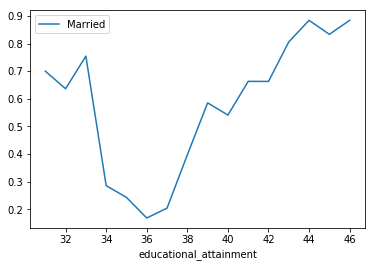

In [10]:
## Can read in sql file too 
with open('marriage_by_education.sql') as f:
    sql = f.read()
    m = pd.read_sql(sql, con,
    index_col='educational_attainment')
    m.plot()